# Bipartiteness
Graph is [bipartite](https://en.wikipedia.org/wiki/Bipartite_graph) if the nodes can be split into two disjoint sets such that there is no edge between nodes inside the same set.

![day89-bipartiteness](resource/day89-bipartiteness.png)
bipartite graph

Test on graph bipartiteness is fairly easy.

Use DFS [or BFS] to search the graph and simultaneously count the current distance. Nodes reachable on odd number of steps form the first partition, nodes reachable on even number of steps form the second partition. If any nodes complies both conditions, the graph is not bipartite.

This problem is yet another showcase of how difficult a problem can be once we alter parameters.

We say that graph is [k-partite](https://en.wikipedia.org/wiki/Multipartite_graph) if the nodes can be split into k disjoint sets such that there is no edge between nodes inside the same set. Hence bipartite graph is a special case of k=2.

The time complexity of 2-partite test is obviously O(|V|+|E|), where V is a set of nodes and E is a set of edges. The general problem of k-partite test is however NP-complete, at least as long as we can’t make any further assumptions.

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## algorithm

In [2]:
def test_bipartiteness(graph):
    partition = {}
    nodes = [(i, None) for i in graph]

    while nodes:
        node, color = nodes.pop()

        # assign default color
        if color is None:
            color = partition.get(node, 0)

        # test bipartiteness
        if node in partition:
            if partition[node] != color:
                raise ValueError('graph is not bipartite')
            continue

        # assign partition, DFS
        partition[node] = color
        nodes.extend((i, 1 - color) for i in graph[node])

    return partition

## graph #1

In [3]:
graph = nx.complete_multipartite_graph(5, 5)
partition = test_bipartiteness(graph)
partition

{9: 0, 4: 1, 8: 0, 3: 1, 7: 0, 2: 1, 6: 0, 1: 1, 5: 0, 0: 1}

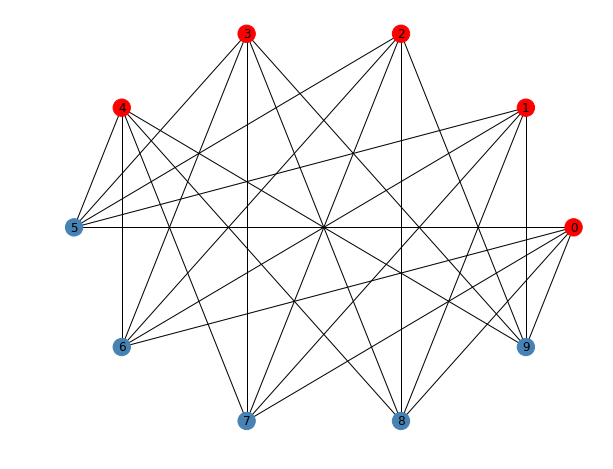

In [4]:
plt.figure(figsize=(10, 8))
plt.axis('off')

colors = ['steelblue', 'red']
node_color = [colors[partition[i]] for i in graph]
pos = nx.circular_layout(graph)

nx.draw_networkx(graph, pos=pos, node_color=node_color)

## graph #2

In [5]:
graph = nx.circulant_graph(10, [1])
partition = test_bipartiteness(graph)
partition

{9: 0, 8: 1, 7: 0, 6: 1, 5: 0, 4: 1, 3: 0, 2: 1, 1: 0, 0: 1}

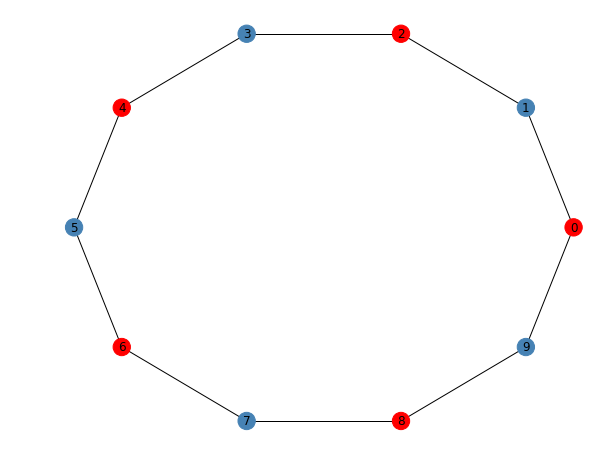

In [6]:
plt.figure(figsize=(10, 8))
plt.axis('off')

colors = ['steelblue', 'red']
node_color = [colors[partition[i]] for i in graph]
pos = nx.circular_layout(graph)

nx.draw_networkx(graph, pos=pos, node_color=node_color)

## graph #3

In [7]:
try:
    graph = nx.complete_multipartite_graph(2, 2, 2)
    test_bipartiteness(graph)
except ValueError as e:
    print(e)

graph is not bipartite


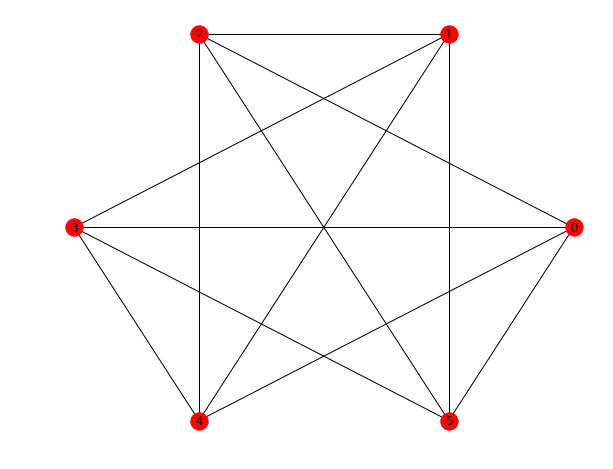

In [8]:
plt.figure(figsize=(10, 8))
plt.axis('off')

nx.draw_networkx(graph, pos=nx.circular_layout(graph))